In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob 
from wordcloud import WordCloud
import seaborn as sns
from datetime import datetime

In [2]:
df=pd.read_csv('netflix_titles.csv')

In [4]:
# Check the first few rows of the dataset
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [5]:
df.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [8]:
# Check the information about the dataset (data types, non-null counts, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
# Summary statistics of numerical columns
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
# Summary statistics of categorical columns
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [11]:
# Check for missing values in each column
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


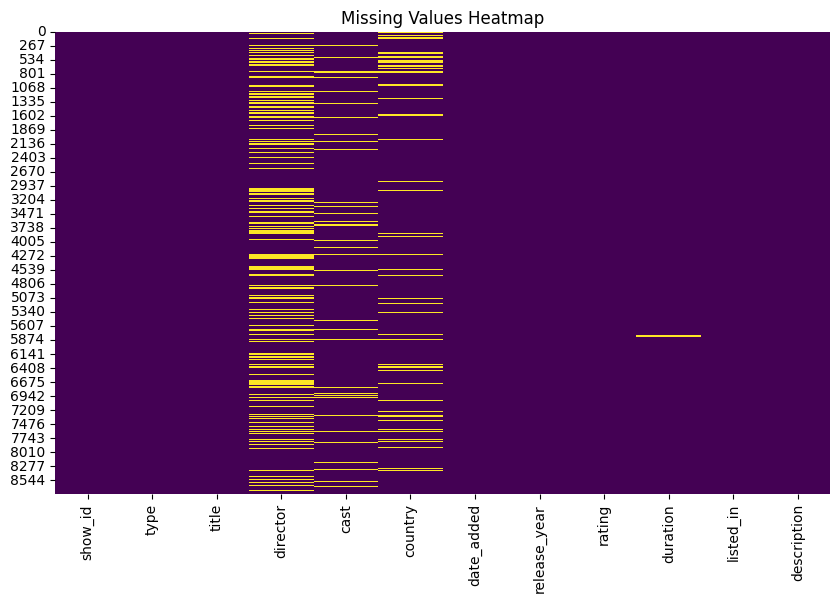

In [13]:
# Visualize missing values using a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


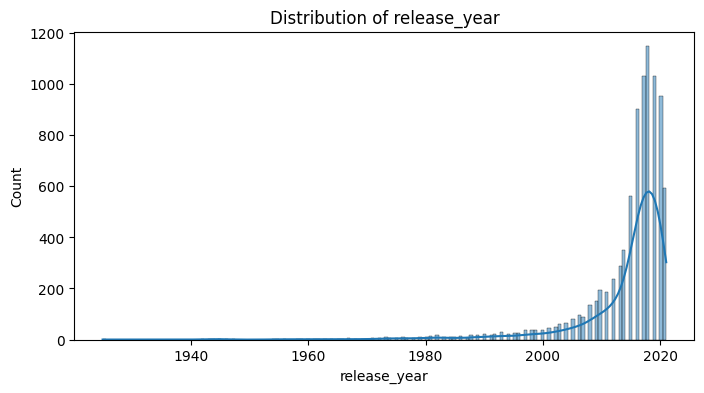

In [14]:
# Explore the distribution of numerical features with histograms
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [18]:
print(df.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [19]:
df.shape


(8807, 12)

In [20]:
# Crosstabulation between two categorical variables
crosstab_table = pd.crosstab(df['cast'], df['country'])
print(crosstab_table)

country                                             , France, Algeria  \
cast                                                                    
'Najite Dede, Jude Chukwuka, Taiwo Arimoro, Ode...                  0   
4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, IN...                  0   
50 Cent, Ryan Phillippe, Bruce Willis, Rory Mar...                  0   
A.J. LoCascio, Sendhil Ramamurthy, Fred Tatasci...                  0   
A.R. Rahman                                                         0   
...                                                               ...   
İbrahim Büyükak, Zeynep Koçak, Gupse Özay, Ceng...                  0   
İbrahim Çelikkol, Belçim Bilgin, Alican Yücesoy...                  0   
Şahin Irmak, İrem Sak, Gonca Vuslateri, Emre Ka...                  0   
Şükrü Özyıldız, Aslı Enver, Şenay Gürler, Başak...                  0   
Ṣọpẹ́ Dìrísù, Wunmi Mosaku, Matt Smith, Malaika...                  0   

country                                           

In [22]:
#DISTRIBUTION OF CONTENT RATINGS ON NETFLIX

z = df.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='rating', 
                  title='Distribution of Content Ratings on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

The graph above shows that the majority of content on Netflix is categorized as “TV-MA”, which means that most of the content available on Netflix is intended for viewing by mature and adult audiences.



In [23]:
#Top 5 actors

df['cast']=df['cast'].fillna('No Cast Specified')
filtered_cast=pd.DataFrame()
filtered_cast=df['cast'].str.split(',',expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actor']
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Cast Specified']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop5=actors.head()
actorsTop5=actorsTop5.sort_values(by=['Total Content'])
fig2=px.bar(actorsTop5,x='Total Content',y='Actor', title='Top 5 Actors on Netflix')
fig2.show()

In [24]:
#Top 5 Directors on Netflix

df['director']=df['director'].fillna('No Director Specified')
filtered_directors=pd.DataFrame()
filtered_directors=df['director'].str.split(',',expand=True).stack()
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='No Director Specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head()
directorsTop5=directorsTop5.sort_values(by=['Total Content'])
fig1=px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors on Netflix')
fig1.show()

In [25]:
#To analyze from this data is the trend of production over the years on Netflix:

df1=df[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Trend of content produced over the years on Netflix')
fig3.show()

The above line graph shows that there has been a decline in the production of the content for both movies and other shows since 2018.

In [26]:
#the sentiment of content on Netflix: positive, negative, neutral

dfx=df[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig4.show()

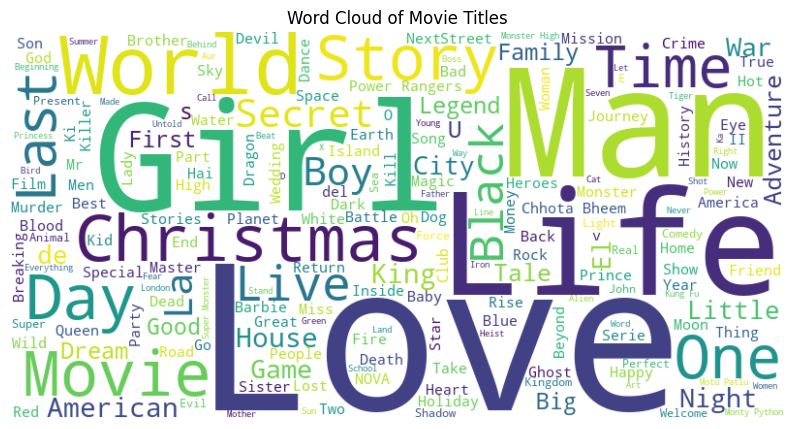

In [29]:
#WORD CLOUD VISUALIZATION
# Concatenate all movie titles to create a word cloud
all_titles = ' '.join(df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()

In [42]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
correlation_matrix



/var/folders/m_/g6wnbv8j61lb0mjf2qpt8z7c0000gn/T/ipykernel_43944/2408370214.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,release_year
release_year,1.0


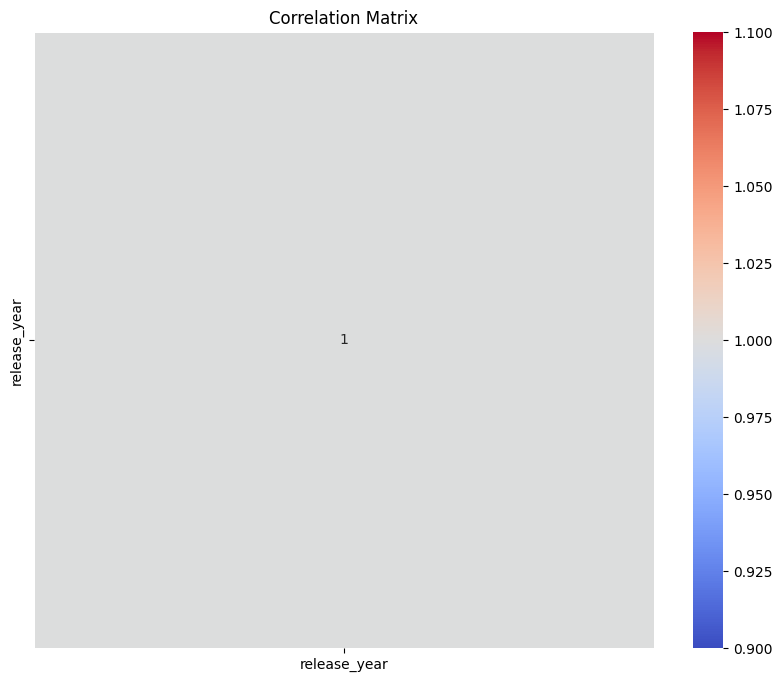

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [44]:
x = df.groupby(['type'])['type'].count()
y = len(df)
r=((x/y)).round(2)
mf_ratio = pd.DataFrame(r).T


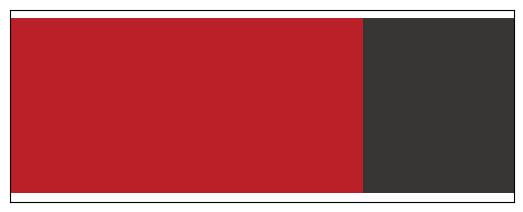

In [45]:
fig, ax = plt.subplots(1,1,figsize=(6.5,2.5))
ax.barh(mf_ratio.index, mf_ratio['Movie'],
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'],
        color='#221f1f', alpha=0.9, label='Female')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

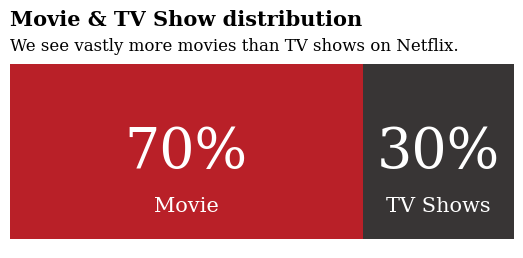

In [46]:
fig, ax = plt.subplots(1,1,figsize=(6.5,2.5))
ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%",
                xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2,i),
                va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                color='white')
    ax.annotate("TV Shows", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

fig.text(0.125,1.0,'Movie & TV Show distribution',fontfamily='serif',fontsize=15,fontweight='bold')
fig.text(0.125,0.90,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12,fontweight='light')
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)
ax.legend().set_visible(False)
plt.show()


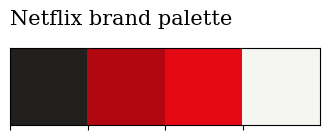

In [47]:
#VISUALIZATION
#Netflix’s Brand Palette

sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])
plt.title("Netflix brand palette",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

In [67]:
tl_dates = [
    "1997nFounded",
    "1998nMailServices",
    "2003nGoesPublic",
    "2007nStremingservice",
    "2016nGoesGlobal",
    "2021nNetflix & Chill"
]
tl_x = [1,2,4,5.3,8,9]

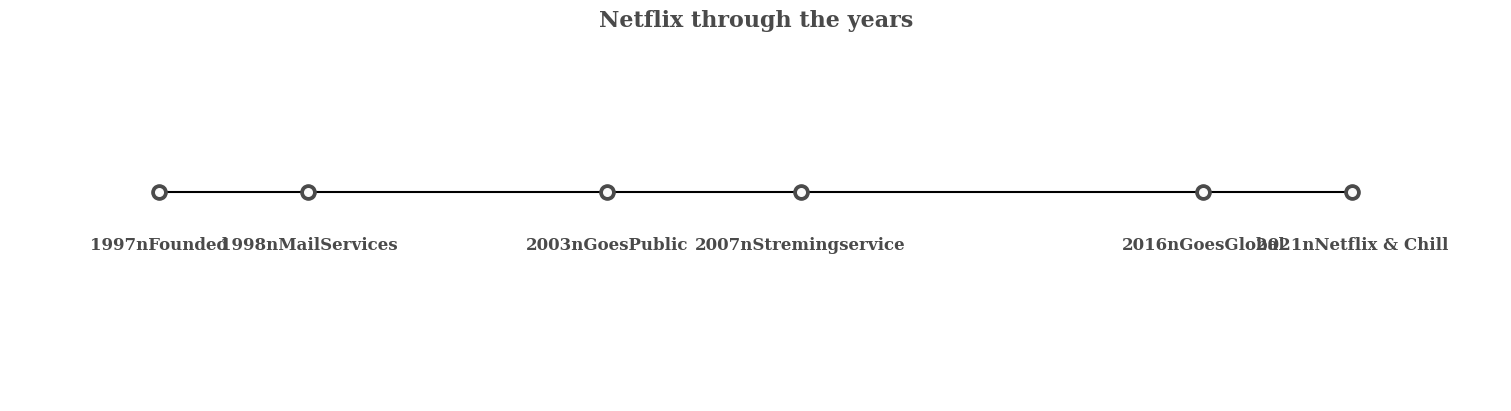

In [68]:
fig,ax = plt.subplots(figsize=(15,4),constrained_layout=True)
ax.set_ylim(-2,1.5)
ax.set_xlim(0,10)
ax.axhline(0, xmin=0.1, xmax=0.9,c="#000000",zorder=1)
ax.scatter(tl_x,np.zeros(len(tl_x)),s=120,c="#4a4a4a",zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
plt.show()